# 4.8 Grouping Data & Aggregating Variables

## Contents
### Importing Libraries
### Importing Data
### Path to Storage
#### Step 1
#### Step 2
#### Step 3
#### Step 4
#### Step 5
#### Step 6
#### Step 7
#### Step 8
#### Step 9
#### Step 10

### Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd
import os

### Path to Storage

In [3]:
# Path to storage location
path = r'C:\Users\ihs10539\Achievement 4 Project'

### Importing Data

In [5]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', '02.02_Prepared Data', '4.8_Task_df_ords_prods_merged_derived_GDAV.pkl'))

## Step 1

Done

## Step 2

In [10]:
# creat subset
df_ords_prods_merge_subset = df_ords_prods_merge[:1000000]

In [12]:
df_ords_prods_merge_subset.groupby(['department_id']).agg({'order_number':['mean']})

,order_number
,mean
department_id,
1,14.800024
2,17.091743
3,17.913544
4,17.893092
5,15.214270
6,15.382135
7,17.694027
8,16.458105


In [14]:
# Use groupby and agg functions to calculate mean of user_order_number
df_ords_prods_merge.groupby(['department_id']).agg({'order_number':['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


## Step 3

Since the entire dataframe includes all department_id values it leads to quite a bit of changes in mean values compared to the subset.
Due to this larger range of data we are given a broader scope on customer behavior to include things like more frequent ordering patterns.
Thus giving us a more accurate way of drilling down into the data as well as giving more options on how to slice it up.

## Step 4

In [19]:
# loyalty flag was taken care of during exercise so just verifying it is still available
df_ords_prods_merge.head(20)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer
5,1,2398795,1,prior,2,3,7,15.0,196,1,...,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer
6,1,2398795,1,prior,2,3,7,15.0,10258,2,...,Pistachios,117,19,3.0,both,Regularly busy,Slowest days,Average orders,10,New customer
7,1,2398795,1,prior,2,3,7,15.0,12427,3,...,Original Beef Jerky,23,19,4.4,both,Regularly busy,Slowest days,Average orders,10,New customer
8,1,2398795,1,prior,2,3,7,15.0,13176,4,...,Bag of Organic Bananas,24,4,10.3,both,Regularly busy,Slowest days,Average orders,10,New customer
9,1,2398795,1,prior,2,3,7,15.0,26088,5,...,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Slowest days,Average orders,10,New customer


In [21]:
# Since column still available here is the count output of said flag
df_ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

## Step 5

In [24]:
# As requested with the utilization of the loyalty flag as the grouping category I am then able to have it to pull mean, min, max, std, & med for me.
df_ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'std', 'median']})

prices                                 
                       mean  min      max         std median
loyalty_flag                                                
Loyal customer    10.386336  1.0  99999.0  328.017787    7.4
New customer      13.294670  1.0  99999.0  597.560299    7.4
Regular customer  12.495717  1.0  99999.0  539.720919    7.4

In [26]:
# Remove outliers from the 'prices' column in the copied DataFrame
df_ords_prods_merge_filtered = df_ords_prods_merge[df_ords_prods_merge['prices'] < 99999]

In [28]:
# Group by 'loyalty_flag' and calculate the required statistics on the copied DataFrame
df_ords_prods_merge_filtered.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'std', 'median']})

prices                                 
                       mean  min      max         std median
loyalty_flag                                                
Loyal customer     9.579349  1.0  14900.0  164.031823    7.4
New customer      10.059917  1.0  14900.0  183.440124    7.4
Regular customer   9.894716  1.0  14900.0  176.732934    7.4

In [30]:
# Remove outliers from the 'prices' column in the copied DataFrame
df_ords_prods_merge_filtered = df_ords_prods_merge[df_ords_prods_merge['prices'] < 14900]

In [32]:
# Group by 'loyalty_flag' and calculate the required statistics on the copied DataFrame
df_ords_prods_merge_filtered.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'std', 'median']})

prices                            
                      mean  min   max       std median
loyalty_flag                                          
Loyal customer    7.773575  1.0  25.0  4.206151    7.4
New customer      7.801206  1.0  25.0  4.266834    7.4
Regular customer  7.798262  1.0  25.0  4.254886    7.4

**NOTE:**
So I thought I had removed the outliers of 14900 and 99999 in previous exercises but I must not have kept up with the newer dataframes I had created.
My guess is I reverted to using the naming of the original data frame out of habit despite trying to create new data frames to try and preserve
original data.
Will carry df_ords_prods_merge_filtered on through the rest of this exercise with an additional note at export so that the updated data can carry on for the last
two exercises.

## Step 6

In [36]:
# Generate average spending column
df_ords_prods_merge_filtered.loc[:, 'average_spend'] = df_ords_prods_merge_filtered.groupby(['user_id'])['prices'].transform('mean')

C:\Users\ihs10539\AppData\Local\Temp\ipykernel_10772\534578457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_merge_filtered.loc[:, 'average_spend'] = df_ords_prods_merge_filtered.groupby(['user_id'])['prices'].transform('mean')


In [38]:
# Verify
df_ords_prods_merge_filtered.head(20)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
5,1,2398795,1,prior,2,3,7,15.0,196,1,...,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797
6,1,2398795,1,prior,2,3,7,15.0,10258,2,...,117,19,3.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797
7,1,2398795,1,prior,2,3,7,15.0,12427,3,...,23,19,4.4,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797
8,1,2398795,1,prior,2,3,7,15.0,13176,4,...,24,4,10.3,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797
9,1,2398795,1,prior,2,3,7,15.0,26088,5,...,23,19,4.7,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797


In [40]:
# Assign less than 10 with Low_spender label
df_ords_prods_merge_filtered.loc[df_ords_prods_merge_filtered.loc[:, 'average_spend']<10,'spender_flag']='Low_spender'

C:\Users\ihs10539\AppData\Local\Temp\ipykernel_10772\1639234920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_merge_filtered.loc[df_ords_prods_merge_filtered.loc[:, 'average_spend']<10,'spender_flag']='Low_spender'


In [42]:
# Assign more and equal to 10 with high_spender label
df_ords_prods_merge_filtered.loc[df_ords_prods_merge_filtered.loc[:, 'average_spend']>= 10, 'spender_flag'] = 'High_spender'

<Axes: xlabel='spender_flag'>

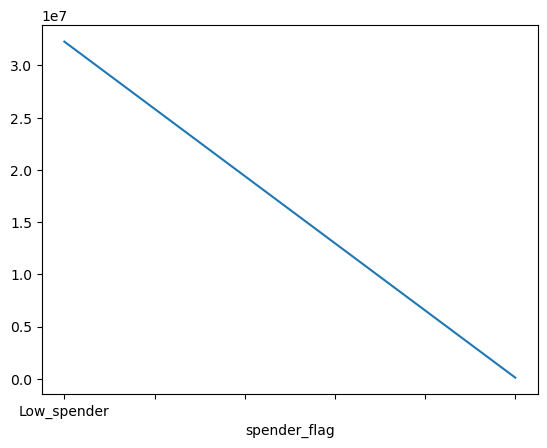

In [52]:
# verify labels
df_ords_prods_merge_filtered['spender_flag'].value_counts(dropna = False).plot.line()

## Step 7

In [73]:
# Generate customer frequency column
df_ords_prods_merge_filtered.loc[:, 'customer_frequency'] = df_ords_prods_merge_filtered.groupby(['user_id'])['days_since_prior_order'].transform('median')

In [75]:
# verify
df_ords_prods_merge_filtered.head(20)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,prices,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5
5,1,2398795,1,prior,2,3,7,15.0,196,1,...,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5
6,1,2398795,1,prior,2,3,7,15.0,10258,2,...,3.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5
7,1,2398795,1,prior,2,3,7,15.0,12427,3,...,4.4,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5
8,1,2398795,1,prior,2,3,7,15.0,13176,4,...,10.3,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5
9,1,2398795,1,prior,2,3,7,15.0,26088,5,...,4.7,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5


In [79]:
# Assign above 20 with non-frequent label
df_ords_prods_merge_filtered.loc[df_ords_prods_merge_filtered.loc[:, 'customer_frequency'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [81]:
# Assign above 10 & below and equal to 20 with regurlar label
df_ords_prods_merge_filtered.loc[(df_ords_prods_merge_filtered.loc[:, 'customer_frequency'] > 10) & (df_ords_prods_merge_filtered['customer_frequency'] <=20), 'frequency_flag'] = 'Regular customer'

In [83]:
# Assign less than 10 with frequent label
df_ords_prods_merge_filtered.loc[df_ords_prods_merge_filtered.loc[:, 'customer_frequency'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [85]:
# Verify count info for column
df_ords_prods_merge_filtered['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent customer        21556644
Regular customer          7207340
Non-frequent customer     3635743
NaN                             5
Name: count, dtype: int64

In [87]:
# Verify top 60 rows worth of information
df_ords_prods_merge_filtered[['user_id', 'days_since_prior_order', 'customer_frequency', 'frequency_flag']].head(60)

,user_id,days_since_prior_order,customer_frequency,frequency_flag
0,1,NaN,20.5,Non-frequent customer
1,1,NaN,20.5,Non-frequent customer
2,1,NaN,20.5,Non-frequent customer
3,1,NaN,20.5,Non-frequent customer
4,1,NaN,20.5,Non-frequent customer
5,1,15.0,20.5,Non-frequent customer
6,1,15.0,20.5,Non-frequent customer
7,1,15.0,20.5,Non-frequent customer
8,1,15.0,20.5,Non-frequent customer
9,1,15.0,20.5,Non-frequent customer


## Step 8

Done

## Step 9

In [92]:
# Export the updated dataframe as a pickle file
df_ords_prods_merge_filtered.to_pickle(os.path.join(path, '02_Data','02.02_Prepared Data', '4.8_Task_orders_products_combined_merged_new_variables_derived_aggregated.pkl'))

### NOTE! df_ords_prods_merge_filtered has the 14900 and 99999 values removed from the price column

## Step 10